### Imports & Setup

In [1]:
import sys
import os
# Add parent directory to path so we can import our src modules
sys.path.append('..')

from src import config, data_cleaning
import pyspark.sql.functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Spark
spark = data_cleaning.get_spark_session("EDA_Notebook")
df = data_cleaning.load_data(spark, f"../{config.INPUT_PATH}")
df = data_cleaning.clean_data(df)

print("Data Loaded & Cleaned for Analysis")

Loading data from ../data/WA_Fn-UseC_-Telco-Customer-Churn.csv...
Cleaning data...
Data Loaded & Cleaned for Analysis


### Target Variable Distribution

C:\Users\Punk\AppData\Local\Temp\ipykernel_4948\1775946860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="label", y="count", data=churn_counts, palette="viridis")


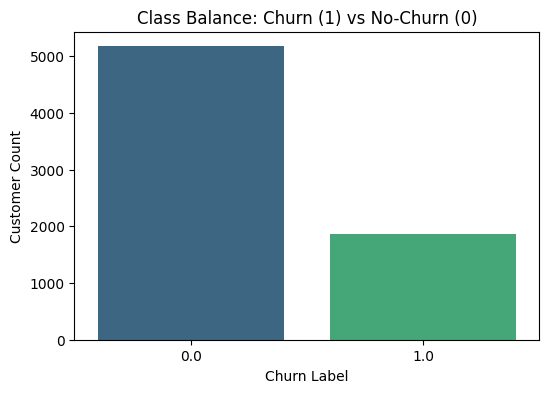

In [ ]:
# Spark Aggregation
churn_counts = df.groupBy("label").count().toPandas()

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x="label", y="count", data=churn_counts, palette="viridis", hue="label")
plt.title("Class Balance: Churn (1) vs No-Churn (0)")
plt.xlabel("Churn Label")
plt.ylabel("Customer Count")
# save plot to assets
os.makedirs("../assets", exist_ok=True)
plt.savefig("../assets/churn_class_balance.png")
plt.show()

### Numerical Analysis (Contract vs Charges)

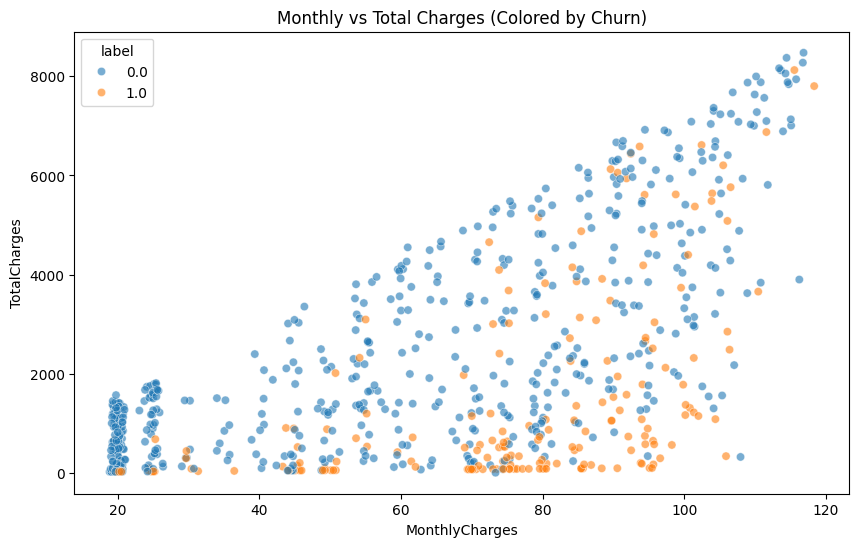

In [3]:
# We sample 10% of data for scatter plots to keep plotting fast
# (Common technique in Big Data EDA)
pdf_sample = df.sample(fraction=0.1, seed=42).select("MonthlyCharges", "TotalCharges", "label").toPandas()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pdf_sample, x="MonthlyCharges", y="TotalCharges", hue="label", alpha=0.6)
plt.title("Monthly vs Total Charges (Colored by Churn)")
# save plot to assets
os.makedirs("../assets", exist_ok=True)
plt.savefig("../assets/monthly_vs_total_charges.png")
plt.show()

### Categorical Analysis

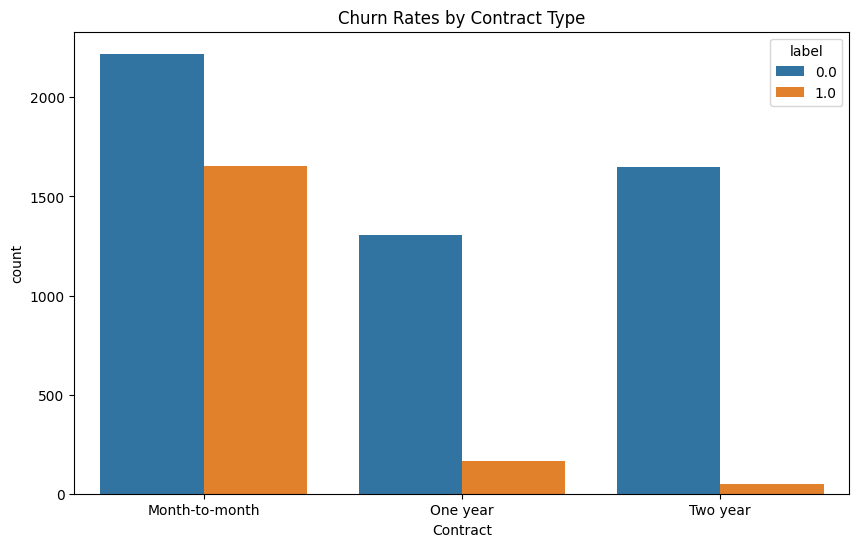

In [4]:
# Let's look at Contract Type
contract_churn = df.groupBy("Contract", "label").count().toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(x="Contract", y="count", hue="label", data=contract_churn)
plt.title("Churn Rates by Contract Type")
# save plot to assets
os.makedirs("../assets", exist_ok=True)
plt.savefig("../assets/churn_by_contract_type.png")
plt.show()